In [29]:
# Load the required libraries 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

from xgboost import XGBClassifier

In [30]:
# Load the required data set 
df = pd.read_csv("../data/preprocessed/fraudTrain.csv")
df.head()

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,1,1,0,37
1,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0,1,1,0,47
2,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,1,1,0,63
3,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,1,1,0,58
4,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0,1,1,0,39


**Split data into independent(X) and dependent(y) features**

In [31]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

**Split data into test and train** 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.shape

(1037340, 17)

In [34]:
y_test.shape

(259335,)

In [35]:
df.shape

(1296675, 18)

# Model Training
## XGBoost Classifier

In [36]:
# Create an instance of XGBoost Classifier
xgboost_clf = XGBClassifier()

In [37]:
# Train the model 
xgboost_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**Model Evaluation**

In [38]:
# Run predictions using the fitted model
y_pred = xgboost_clf.predict(X_test)

In [39]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9990899801415158

In [40]:
# Precision Score 
precision_score(y_test, y_pred)

0.9668721109399075

Out of all fraud cases flagged by the model on the validation dataset, 94% were correctly flagged

In [41]:
# Recall Score
recall_score(y_test, y_pred)

0.8667127071823204

Out of all truth fraud cases, only 83% percent were flagged. 

In [42]:
# f1 score 
f1_score(y_test, y_pred)

0.9140568099053168

*Confusion Matrix*

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [44]:
cm = confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'Truth')

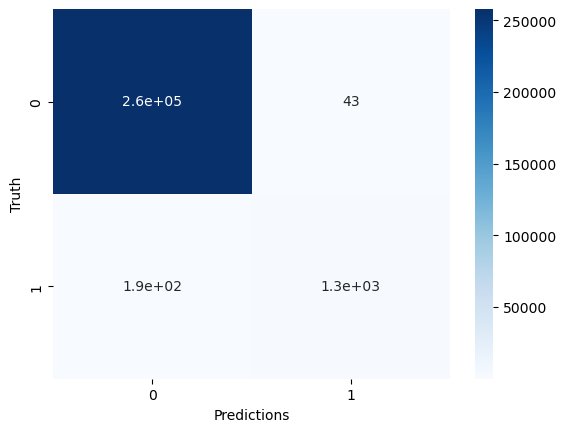

In [45]:
sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257887
           1       0.97      0.87      0.91      1448

    accuracy                           1.00    259335
   macro avg       0.98      0.93      0.96    259335
weighted avg       1.00      1.00      1.00    259335



## LightGBM Classifier

In [48]:
from lightgbm import LGBMClassifier

In [49]:
# Create an instance of the model 
lightgbm_clf = LGBMClassifier(objective='binary', metric='binary_logloss')

In [50]:
# Fit the model  
lightgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6058, number of negative: 1031282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.145803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 1037340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005840 -> initscore=-5.137178
[LightGBM] [Info] Start training from score -5.137178


LGBMClassifier(metric='binary_logloss', objective='binary')

In [51]:
# Run predictions on the validation dataset 
y_pred = lightgbm_clf.predict(X_test)

**Model Evaluation** - LightGBM Classifier

In [52]:
# Accuracy Score 
accuracy_score(y_test, y_pred)

0.997940887269362

In [53]:
# Precision Score 
precision_score(y_test, y_pred)

0.8227401129943502

In [54]:
recall_score(y_test, y_pred)

0.8045580110497238

In [55]:
# f1 score 
f1_score(y_test, y_pred)

0.8135474860335196

<Axes: >

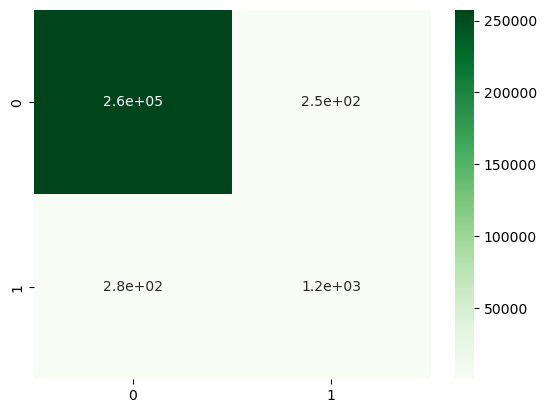

In [56]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Greens", annot=True)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257887
           1       0.82      0.80      0.81      1448

    accuracy                           1.00    259335
   macro avg       0.91      0.90      0.91    259335
weighted avg       1.00      1.00      1.00    259335



## Logistic Regression

## Random Forest Regression 

## PyCaret Classification - Find how to use it!